# House Price Prdiction Regression Project

## Project Goal

Predict the price of a house by its features. If you are a buyer or seller of the house but you don't know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

## Load Modules/Libraries

In [110]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load DataSet

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
print("shape of df_train: ", df_train.shape)
print("shape of df_test: ", df_test.shape)

shape of df_train:  (1460, 81)
shape of df_test:  (1459, 80)


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Know Your Data

### Will use this feature while converting into numerical format/Encoding
Neighborhood <br>
OverallQual<br>
OverallCond<br>
YearBuilt<br>
Foundation<br>
Electrical<br>
KitchenQual<br>
GarageType<br>
GarageFinish<br>
Fence

## Data Integration

In [6]:
df = pd.concat([df_train, df_test])
print('shape of Integrated Data/df: ', df.shape)

shape of Integrated Data/df:  (2919, 81)


In [7]:
len(df_train.columns)

81

In [8]:
len(df_test.columns)

80

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the Brief Information of Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Most null fatures Values
Alley<br>
FireplaceaceQu<br>
PoolQC<br>
Fence<br>
MiscFeature

In [12]:
int_features = df.select_dtypes(include=['int64']).columns
print('Total number of integer features:', int_features.shape[0])

print('Integer feature names: ', int_features.tolist())

Total number of integer features: 26
Integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
float_features = df.select_dtypes(include=['float64']).columns
print('Total number of floating features:', float_features.shape[0])

print('floating feature names: ', float_features.tolist())

Total number of floating features: 12
floating feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [14]:
cat_features = df.select_dtypes(include=['object']).columns
print('Total number of catagorical features:', cat_features.shape[0])

print('catagorical feature names: ', cat_features.tolist())

Total number of catagorical features: 43
catagorical feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical information of Numerical features



In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
df.describe().shape

(8, 38)

## Handling Missing Value

### Visualise null/Missing Value

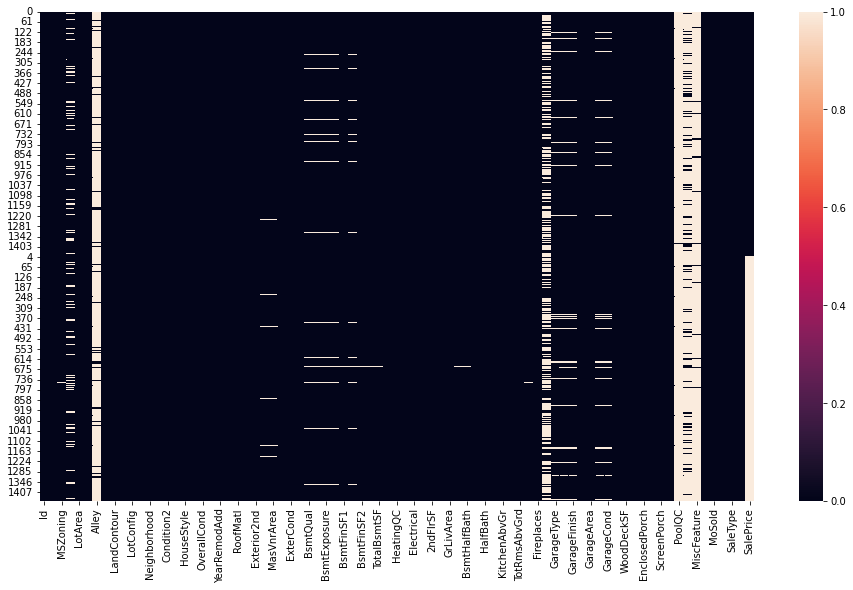

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [18]:
# set index as Id column
df = df.set_index('Id')

In [19]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [20]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Columns/Features

As per objervation we will not drop any feature

In [21]:
# As per domain knowledge we will not drop those features, we will use 'NA' 
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [22]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [23]:
# As per domain knowledge we will not drop those features, we will use 'NA'
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [24]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [25]:
df['LotFrontage'].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

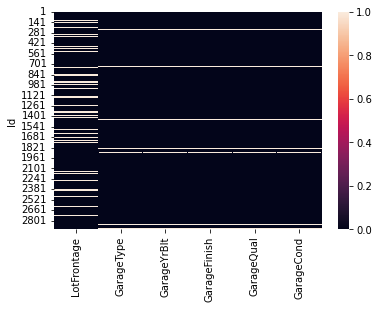

In [26]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## Missing Value Imputation

In [27]:
missing_value_feat = null_percent[null_percent > 0]
print('Total missing value features = ', len(missing_value_feat))

Total missing value features =  35


In [28]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [29]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print('Total number of categorical features = ', len(cat_na_feat))
cat_na_feat

Total number of categorical features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [30]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print('Total number of integer features = ', len(int_na_feat))

Total number of integer features =  0


In [31]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print('Total number of float features = ', len(float_na_feat))
float_na_feat

Total number of float features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning=0.137033

In [32]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


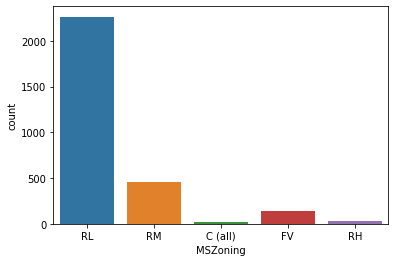

In [33]:
sns.countplot(df['MSZoning'])

In [34]:
### backup pf original data
df_mvi =df.copy()
df_mvi.shape

(2919, 80)

In [35]:
mszoning_mode = df['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace = True)
df_mvi['MSZoning'].isnull().sum()

0

In [36]:
def oldNewCountPlot(df, df_new, feature):
  plt.subplot(121)
  sns.countplot(df[feature])
  plt.title('Old Data Distribution')
  plt.subplot(122)
  sns.countplot(df_new[feature])
  plt.title('New Data Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


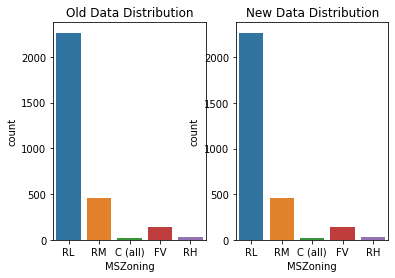

In [37]:
oldNewCountPlot(df, df_mvi, 'MSZoning')

## Handling Alley = 93.216855

In [38]:
df_mvi['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [39]:
alley_cont = 'NA'
df_mvi['Alley'].replace(np.nan, alley_cont, inplace = True)
df_mvi['Alley'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


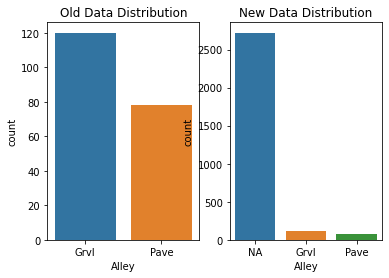

In [40]:
oldNewCountPlot(df, df_mvi, 'Alley')

### Handling LotFrontage = 16.649538

In [41]:
def boxHistPlot(df, figsize=(16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.distplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


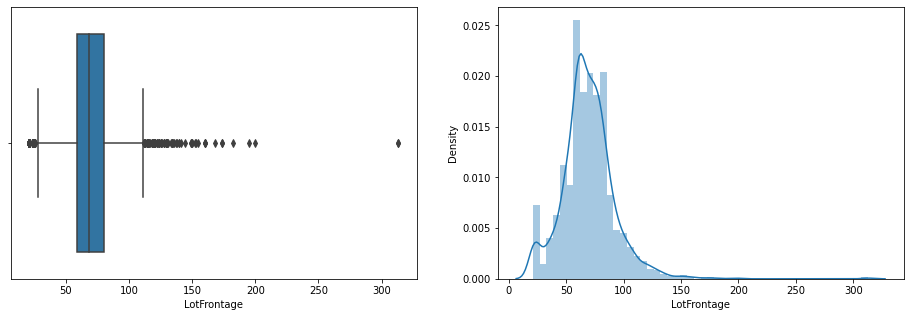

In [42]:
boxHistPlot(df['LotFrontage'])

In [43]:
lotfrontage_mean = df['LotFrontage'].mean()
df_mvi['LotFrontage'].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi['LotFrontage'].isnull().sum()

0

In [44]:
def oldNewBoxHistPlot(df, df_new, feature, figsize=(16,10)):
  plt.figure(figsize=figsize)
  plt.subplot(221)
  sns.boxplot(df[feature])
  plt.title('Old Data Distribution')
  plt.subplot(222)
  sns.distplot(df[feature])
  plt.title('old Data Distribution')
  
  plt.subplot(223)
  sns.boxplot(df_new[feature])
  plt.title('New Data Distribution')
  plt.subplot(224)
  sns.distplot(df_new[feature])
  plt.title('New Data Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

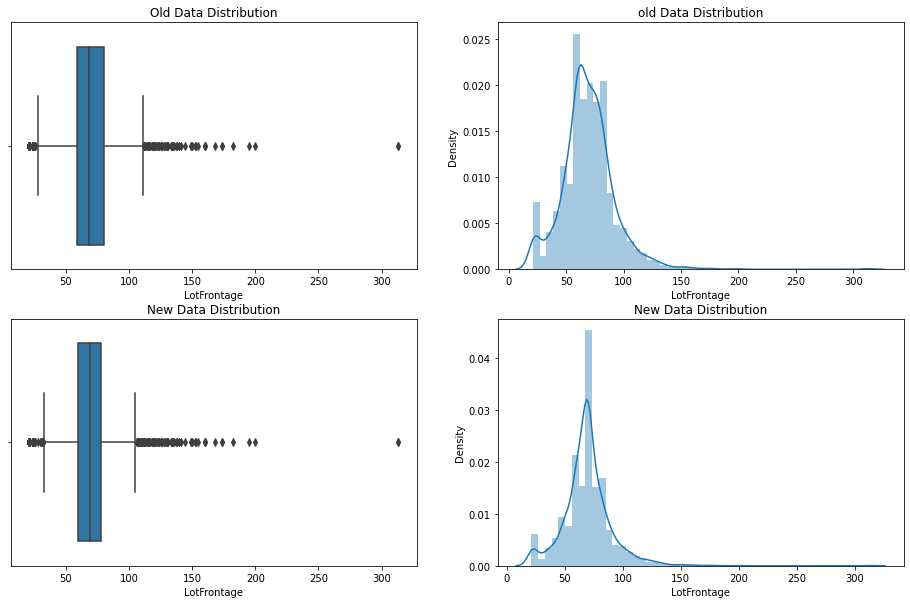

In [45]:
oldNewBoxHistPlot(df, df_mvi, 'LotFrontage')

### Handling Utilities = 0.068517

In [46]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
utilities_mode = df['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace = True)
df_mvi['Utilities'].isnull().sum()

0

### Handling 
Exterior1st=0.034258<br>
Exterior2nd=0.034258

In [48]:
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [49]:
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [50]:
exterior1st_mode = df['Exterior1st'].mode()[0]
exterior2nd_mode = df['Exterior2nd'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi['Exterior2nd'].replace(np.nan, exterior2nd_mode, inplace = True)
print('E1st is null: ', df_mvi['Exterior1st'].isnull().sum())
print('E2nd is null: ', df_mvi['Exterior2nd'].isnull().sum())

E1st is null:  0
E2nd is null:  0


### Handling
MasVnrType=0.822199<br>
MasVnrArea=0.787941

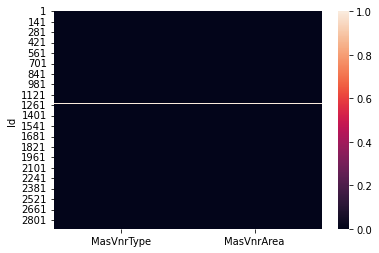

In [51]:
sns.heatmap(df[['MasVnrType', 'MasVnrArea']].isnull())

In [52]:
df[df[['MasVnrType', 'MasVnrArea']].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Nor

In [53]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [54]:
masvnrtype_mode = df['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, masvnrtype_mode, inplace = True)
df_mvi['MasVnrType'].isnull().sum()

0

In [55]:
df['MasVnrArea'].value_counts().head()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
Name: MasVnrArea, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


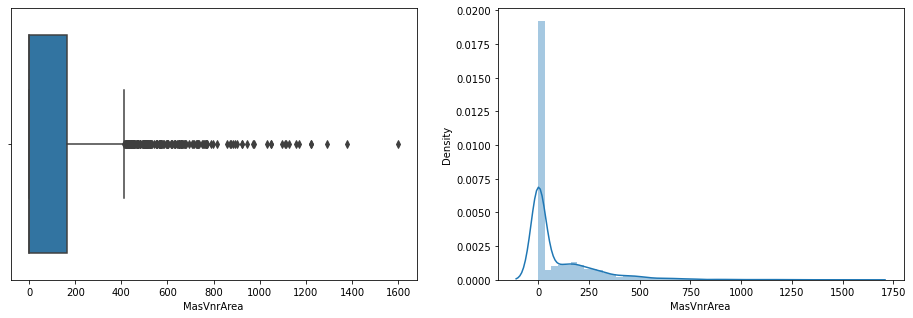

In [56]:
boxHistPlot(df['MasVnrArea'])

In [57]:
masvnrarea_constant = 0
df_mvi['MasVnrArea'].replace(np.nan, masvnrarea_constant, inplace = True)
df_mvi['MasVnrArea'].isnull().sum()

0

### Handling Bsmt Features

cat_bsmt_feat = <br>
BsmtQual =         2.774923<br>
BsmtCond  =        2.809181<br>
BsmtExposure =     2.809181<br>
BsmtFinType1 =     2.706406<br>
BsmtFinType2 =     2.740665<br>

num_bsmt_feat = <br>
BsmtFinSF1  =      0.034258<br>
BsmtFinSF2 =       0.034258<br>
BsmtUnfSF  =       0.034258<br>
TotalBsmtSF =      0.034258<br>
BsmtFullBath =     0.068517<br>
BsmtHalfBath =     0.068517<br>

In [58]:
cat_bsmt_feat = [
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2'
]

num_bsmt_feat = [
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath'
]

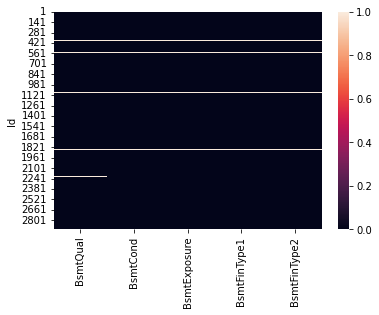

In [59]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [60]:
for feat in cat_bsmt_feat:
  print(f'value count of {feat}: {df[feat].value_counts()}')

value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [61]:
bsmt_cont = 'NA'
for feat in cat_bsmt_feat:
  df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

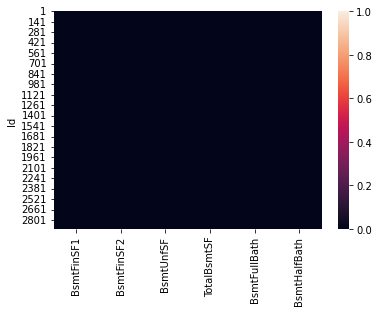

In [62]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [63]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
bsmt_num = 0
for feat in num_bsmt_feat:
  df_mvi[feat].replace(np.nan, bsmt_num, inplace = True)
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Handling 
Electrical =0.034258<br>
KitchenQual =0.034258

In [65]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [66]:
df_ekk = df[['Electrical', 'KitchenQual', 'KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [67]:
electrical_mode = df['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan, electrical_mode, inplace = True)
df_mvi['Electrical'].isnull().sum()

0

In [68]:
kitchenQual_mode = df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan, kitchenQual_mode, inplace = True)
df_mvi['KitchenQual'].isnull().sum()

0

### Handling Remaining cat featutres
Functional    =    0.068517 mode<br>
FireplaceQu   =   48.646797 NA<br>
PoolQC        =   99.657417 NA<br>
Fence         =   80.438506 NA<br>
MiscFeature   =   96.402878 NA<br>
SaleType       =  0.034258  mode


In [69]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [70]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [71]:
functional_mode = df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, functional_mode, inplace = True)
df_mvi['Functional'].isnull().sum()

0

In [72]:
saletype_mode = df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, functional_mode, inplace = True)
df_mvi['SaleType'].isnull().sum()

0

In [73]:
other_cat_feat = [
'FireplaceQu',      
'PoolQC',      
'Fence',      
'MiscFeature'
]

for feat in other_cat_feat:
  print(f'value count of {feat}: {df[feat].value_counts()}')

value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [74]:
fireplacequ_cont = 'NA'
df_mvi['FireplaceQu'].replace(np.nan, fireplacequ_cont, inplace = True)
df_mvi['FireplaceQu'].isnull().sum()

0

In [75]:
poolqc_cont = 'NA'
df_mvi['PoolQC'].replace(np.nan, poolqc_cont, inplace = True)
df_mvi['PoolQC'].isnull().sum()

0

In [76]:
fence_cont = 'NA'
df_mvi['Fence'].replace(np.nan, fence_cont, inplace = True)
df_mvi['Fence'].isnull().sum()

0

In [77]:
miscfeature_cont = 'NA'
df_mvi['MiscFeature'].replace(np.nan, poolqc_cont, inplace = True)
df_mvi['MiscFeature'].isnull().sum()

0

### Handling Garage Features

GarageType    =   5.378554 NA <br>
GarageFinish   =  5.447071 NA <br>
GarageQual    =   5.447071 NA <br>
GarageCond    =   5.447071 NA <br>

GarageYrBlt  =    5.447071 0 <br>
GarageCars   =    0.034258 0 <br>
GarageArea   =    0.034258 0 <br>

In [78]:
cat_garage_feat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
num_garage_feat = ['GarageYrBlt', 'GarageCars', 'GarageArea']

df_garafe = df[num_garage_feat+cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [79]:
garage_cont = 'NA'
for feat in cat_garage_feat:
  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)

df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [80]:
garage_num = 0
for feat in num_garage_feat:
  df_mvi[feat].replace(np.nan, garage_num, inplace=True)

df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [81]:
df_mvi.isnull().any(axis=1).sum()

1459

## Feature Transformation
### Convert Numerical Features to categorical feature

In [82]:
for_num_conv = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for feat in for_num_conv:
  print(f'{feat}: data type = {df_mvi[feat].dtype}')

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [83]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [84]:
df_mvi['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [85]:
calendar.month_abbr[12]

'Dec'

In [86]:
df_mvi['MoSold']= df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [87]:
for feat in for_num_conv:
  df_mvi[feat] = df_mvi[feat].astype(str)

In [88]:
for feat in for_num_conv:
  print(f'{feat}: data type = {df_mvi[feat].dtype}')

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


## Convert Categorical Features into Numerical Feature
### Ordinal Encoding

In [89]:
ordinal_end_var = [
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC',
'Functional',
'GarageFinish',
'PavedDrive',
'Utilities'
]

print('Total number of features to convert ordinal numerical format:', len(ordinal_end_var) )

Total number of features to convert ordinal numerical format: 18


In [90]:
df_mvi['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [91]:
df_mvi['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [92]:
order_Label = {'Ex':4, 'Gd':3, 'Ta':2, 'Fa':1, 'Po':0 }

In [93]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [94]:
df_mvi['ExterQual'].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [95]:
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes

In [96]:
df_mvi['BsmtExposure'].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [97]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Typ"], ordered=True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=["ELO", "NASewa", "NASeWr", "AllPub"], ordered=True)).cat.codes

In [98]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One Hot Encoding for Nominal Categorical Data

In [99]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features : ", len(object_features))

print("Features: \n ", object_features)

Total object data type features :  32
Features: 
  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [100]:
df_encod['MSZoning']

Id
1            RL
2            RL
3            RL
4            RL
5            RL
6            RL
7            RL
8            RL
9            RM
10           RL
11           RL
12           RL
13           RL
14           RL
15           RL
16           RM
17           RL
18           RL
19           RL
20           RL
21           RL
22           RM
23           RL
24           RM
25           RL
26           RL
27           RL
28           RL
29           RL
30           RM
31      C (all)
32           RL
33           RL
34           RL
35           RL
36           RL
37           RL
38           RL
39           RL
40           RL
41           RL
42           RL
43           RL
44           RL
45           RL
46           RL
47           RL
48           FV
49           RM
50           RL
51           RL
52           RM
53           RM
54           RL
55           RL
56           RL
57           FV
58           RL
59           RL
60           RL
61           RL
62           RM
63   

In [101]:

df_encod[object_features].head(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [102]:
print("shape of DF before encoding: ", df_encod.shape)
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)
print("shape of DF after encoding: ", df_encod.shape)

shape of DF before encoding:  (2919, 80)
shape of DF after encoding:  (2919, 514)


In [103]:
#pd.get_dummies(df_encod['MSZoning'], columns='MSZoning', prefix='MSZoning', drop_first=True)

In [104]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_19

In [105]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

## Split Data for Training & Testing

In [106]:
df_encod.shape

(2919, 514)

In [108]:
len_train = df_train.shape[0]
len_train

1460

In [109]:
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]

X_test = df_encod[len_train:].drop("SalePrice", axis=1)

print("Shape of X_train data : ", X_train.shape)
print("Shape of y_train data : ", y_train.shape )
print("Shape of X_test data : ", X_test.shape )

Shape of X_train data :  (1460, 513)
Shape of y_train data :  (1460,)
Shape of X_test data :  (1459, 513)


## Feature Scaling

In [111]:
sc = StandardScaler()
sc.fit(X_train)

#z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [112]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [113]:
X_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [120]:
### Carry forward for deployment
#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.var_
#sc.with_mean

## Train ML Model

In [127]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor 

In [130]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()
ir = IsotonicRegression()


In [131]:
models = {'a':['LinearRegression', lr],
          'b':['SVR', svr],
          'c':['SGDRegressor', sgdr],
           'd': ['KNeighborsRegressor', knr],
            'e':['GaussianProcessRegressor', gpr],
           'f':['DecisionTreeRegressor', dtr], 
          'g':['GradientBoostingRegressor', gbr],
          'h':['RandomForestRegressor', rfr],
           'i':['XGBRegressor', xgbr],
           'j':['MLPRegressor', mlpr],
            'k':['IsotonicRegression', ir]
          }

In [132]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [134]:
models_score = []
for model in models:
  print("Training model : ", models[model][0])
  score = test_model(models[model][1], X_train, y_train)
  print('Score of model : ', score)
  models_score.append([models[model][0], score[0]])

Training model :  LinearRegression
Score of model :  [-3.526208629433818e+25]
Training model :  SVR
Score of model :  [-0.052133733578430874]
Training model :  SGDRegressor
Score of model :  [-3064.4964253722055]
Training model :  KNeighborsRegressor
Score of model :  [0.5597554811985578]
Training model :  GaussianProcessRegressor
Score of model :  [-5.398916312612222]
Training model :  DecisionTreeRegressor
Score of model :  [0.7113753168627932]
Training model :  GradientBoostingRegressor
Score of model :  [0.8724427109746015]
Training model :  RandomForestRegressor
Score of model :  [0.8443775751018937]
Training model :  XGBRegressor
[18:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Score of model :  [-4.817205920292486]
Training model :  IsotonicRegression
Score of model :  [nan]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 7.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/isotonic.py", line 346, in fit
  

In [135]:
models_score

[['LinearRegression', -3.526208629433818e+25],
 ['SVR', -0.052133733578430874],
 ['SGDRegressor', -3064.4964253722055],
 ['KNeighborsRegressor', 0.5597554811985578],
 ['GaussianProcessRegressor', -5.398916312612222],
 ['DecisionTreeRegressor', 0.7113753168627932],
 ['GradientBoostingRegressor', 0.8724427109746015],
 ['RandomForestRegressor', 0.8443775751018937],
 ['XGBRegressor', 0.8618628834440616],
 ['MLPRegressor', -4.817205920292486],
 ['IsotonicRegression', nan]]